# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, Campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Novas Tecnologias em Banco de Dados</b></center></font>
  
<font size="3"><center>Profa. Dra. Sahudy Montenegro González</center></font>

## <center>Projeto Final</center>

<div style="font-size: 1.1em;">
    <strong>GRUPO 08</strong><br/><br/>
    <strong>Integrante 01</strong>: João Vitor Averaldo Antunes<br/>
    <strong>RA</strong>: 813979<br/><br/>
    <strong>Integrante 02</strong>: Rafael Mori Pinheiro<br/>
    <strong>RA</strong>: 813851
</div>

# Introdução ao Tema

A população mundial é um dos indicadores mais relevantes para compreender as dinâmicas sociais, econômicas e ambientais do planeta. Com mais de 8 bilhões de habitantes, a análise da distribuição populacional, das taxas de crescimento, da urbanização e dos padrões demográficos fornece insights essenciais para o planejamento de políticas públicas, o desenvolvimento sustentável e a definição de estratégias de mercado. Este projeto tem como objetivo o desenvolvimento de um Data Warehouse (DW) que consolide e analise dados populacionais globais, permitindo que gestores e pesquisadores tomem decisões informadas a partir de uma visão integrada dos indicadores demográficos.

## Requisitos de Negócio / Objetivos de Análise

Os principais objetivos deste Data Warehouse incluem:

- **Análise Demográfica Global:**  
  Avaliar a distribuição da população por países, continentes e regiões, identificando tendências de crescimento ou declínio populacional que possam influenciar políticas e estratégias de desenvolvimento.

- **Urbanização:**  
  Monitorar o crescimento das áreas urbanas em comparação com as áreas rurais, identificando regiões com altas taxas de urbanização, o que é crucial para o planejamento de infraestrutura e serviços.

- **Expectativa de Vida e Saúde:**  
  Analisar indicadores de saúde, como a expectativa de vida, para correlacioná-los com fatores demográficos e regionais, contribuindo para a avaliação do impacto de políticas de saúde e bem-estar.

- **Impacto Econômico:**  
  Integrar dados populacionais com indicadores econômicos, como PIB per capita, taxa de desemprego e acesso a serviços básicos, para entender como os fatores demográficos afetam o desempenho econômico e social.

Esta abordagem integrada permitirá uma compreensão aprofundada das dinâmicas populacionais e seu impacto nos diversos setores, contribuindo para decisões estratégicas que promovam o desenvolvimento equilibrado e sustentável.

Para que seja possível compreender os demais passos vamos nos debruçar sobre a nova modelagem:

<center><img src="./figs/modelagem.png" style="max-width:550px; max-height:400px;"></center>


---
# Pacotes e Imports

Nesta primeira seção, importamos os módulos e pacotes que serão utilizados ao longo do projeto.

- **Pandas**: para manipulação e análise de dados.
- **Requests e Requests-HTML**: para realizar requisições HTTP e facilitar o scraping de páginas web.
- **Regex (re)**: para trabalhar com expressões regulares.
- **Asyncio e nest_asyncio**: para permitir execução assíncrona, especialmente útil em processos de scraping que demandam simultaneidade.
- **SQLAlchemy**: para conectar e interagir com bancos de dados.
- **NumPy**: para operações matemáticas e manipulação de arrays.
- **Logging**: para registrar informações, avisos e erros durante a execução do código.
- **BeautifulSoup (bs4)**: para extrair dados de arquivos HTML.
- **IO (StringIO)**: para manipulação de dados em memória.
- **Matplotlib e Seaborn**: para a criação de gráficos e visualizações.

> **Observação:**  
> Os comandos de instalação dos pacotes estão comentados no código para evitar execuções indesejadas, mas podem ser descomentados conforme a necessidade.

In [1]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install requests
# %pip install requests_html
# %pip install re
# %pip install asyncio
# %pip install nest_asyncio
# %pip install sqlalchemy
# %pip install io
# %pip install IPython.display
# %pip install bs4
# %pip install lxml_html_clean
# %pip install psycopg2-binary (ATENÇÃO: pode ser o psycopg2)

In [2]:
# Importação dos pacotes necessários para o projeto
import pandas as pd
import requests
from requests_html import HTMLSession, AsyncHTMLSession
import re
import asyncio
import nest_asyncio
from sqlalchemy import create_engine, text
import numpy as np
import logging
from bs4 import BeautifulSoup
from io import StringIO
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o módulo completo de fetch de dados
from scripts import dados_fetch

# Importando o módulo completo de scrapping
from scripts import scraping

# Importando o módulo completo de ETL
from scripts import integration

# Aplicação de nest_asyncio para evitar conflitos em loops assíncronos
nest_asyncio.apply()

# Ignorar avisos para manter a saída limpa
warnings.filterwarnings("ignore")

# Configuração do logging: Define o nível, o formato e os handlers para saída padrão e para arquivo
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout), logging.FileHandler('scraping.log')]
)

# Instancia o logger para utilização ao longo do projeto
logger = logging.getLogger(__name__)

# Extração dos Dados

---
### PIB

1. **Download dos Dados:**  
   Utilizamos a função `pd.read_csv` para baixar o CSV com os dados do PIB per capita, especificando um header customizado no `storage_options` para identificar a requisição. Também baixamos os metadados associados utilizando a biblioteca `requests`.

2. **Tratamento dos Dados:**  
   - Renomeamos a coluna que contém os valores de PIB per capita para "PIB_Per_Capita", garantindo consistência com o modelo de dados do projeto.
   - Convertamos a coluna "Year" para o tipo inteiro e a coluna "PIB_Per_Capita" para numérico, tratando possíveis erros de conversão.
   - Removemos as linhas que possuem valores ausentes na coluna "PIB_Per_Capita", assegurando a qualidade dos dados para análises futuras.

In [3]:
df_pib_per_capita = dados_fetch.fetch_pib_per_capita()

display(df_pib_per_capita)

,Entity,Code,Year,PIB_Per_Capita
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182
...,...,...,...,...
7058,Zimbabwe,ZWE,2019,3294.8062
7059,Zimbabwe,ZWE,2020,2987.2698
7060,Zimbabwe,ZWE,2021,3184.7854
7061,Zimbabwe,ZWE,2022,3323.1218


---
### Acesso a educação

1. **Download dos Dados e Metadados:**  
   Utilizamos a função `pd.read_csv` para baixar os dados do CSV com os scores de educação, configurando um User-Agent específico via `storage_options`. Simultaneamente, os metadados associados são baixados usando a biblioteca `requests`.

2. **Conversão e Tratamento:**  
   - **Conversão de Tipos:** A coluna `Year` é convertida para inteiro, e a coluna `harmonized_test_scores` é convertida para valores numéricos, tratando possíveis erros de conversão.
   - **Limpeza dos Dados:** Linhas com valores ausentes na coluna `harmonized_test_scores` são removidas para garantir dados consistentes.
   - **Normalização dos Scores:** Os scores são normalizados para gerar um percentual, criando a nova coluna `Acesso_Educacao`. Essa normalização é feita subtraindo o menor valor e dividindo pela faixa (máximo menos mínimo) dos scores.

3. **Seleção de Colunas:**  
   Por fim, o DataFrame é reduzido para conter apenas as colunas de interesse: `Entity`, `Code`, `Year` e `Acesso_Educacao`.

In [4]:
df_acesso_educacao = dados_fetch.fetch_acesso_educacao()

display(df_acesso_educacao)

,Entity,Code,Year,Acesso_Educacao
0,Afghanistan,AFG,2017,18.139005
1,Afghanistan,AFG,2018,18.051639
2,Afghanistan,AFG,2020,18.051639
604,Albania,ALB,2010,33.434287
605,Albania,ALB,2017,44.943048
...,...,...,...,...
58980,Zambia,ZMB,2020,19.276526
59238,Zimbabwe,ZWE,2010,32.337201
59239,Zimbabwe,ZWE,2017,32.989894
59240,Zimbabwe,ZWE,2018,33.040177


---
### Expectativa de Vida

1. **Download dos Dados e Metadados:**  
   - Utiliza-se `pd.read_csv` para baixar o CSV dos dados de expectativa de vida, passando um User-Agent customizado via `storage_options`.
   - Os metadados são obtidos via uma requisição HTTP com a biblioteca `requests`.

2. **Tratamento dos Dados:**  
   - **Renomeação de Coluna:** A coluna original `'life_expectancy_0__sex_total__age_0'` é renomeada para `'Expectativa_Vida'` para padronização com o modelo de dados.
   - **Conversão de Tipos:** A coluna `Year` é convertida para inteiros e a coluna `Expectativa_Vida` para valores numéricos, tratando possíveis erros de conversão.
   - **Limpeza dos Dados:** São removidas as linhas com valores ausentes em `'Expectativa_Vida'`.

3. **Armazenamento:**  
   - Os dados tratados são salvos localmente em um arquivo chamado `expectativa.csv`.

In [5]:
df_expectativa_vida = dados_fetch.fetch_expectativa_vida()

display(df_expectativa_vida)

,Entity,Code,Year,Expectativa_Vida
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975
...,...,...,...,...
21560,Zimbabwe,ZWE,2019,61.0603
21561,Zimbabwe,ZWE,2020,61.5300
21562,Zimbabwe,ZWE,2021,60.1347
21563,Zimbabwe,ZWE,2022,62.3601


---
### Taxa de Mortalidade

1. **Leitura dos Dados:**  
   - Carrega o arquivo CSV usando `pd.read_csv`, que contém informações sobre mortalidade.

2. **Filtragem dos Dados:**  
   - Filtra os registros para manter apenas aqueles onde a coluna `Sex` é igual a `"All"`, garantindo que os dados sejam agregados para todos os sexos.
   - Filtra também para manter os registros onde a coluna `Age group code` é igual a `"Age_all"`, assegurando que os dados se refiram a todas as faixas etárias.

3. **Seleção e Renomeação de Colunas:**  
   - Seleciona apenas as colunas de interesse: `Country Name`, `Year` e `Death rate per 100 000 population`.
   - Cria uma cópia do DataFrame filtrado para evitar alterações na versão original dos dados.
   - Renomeia as colunas para padronizar os nomes:
     - `Country Name` é renomeada para `Entity`
     - `Year` permanece como `Year`
     - `Death rate per 100 000 population` é renomeada para `Taxa_Mortalidade`



In [6]:
df_taxa_mortalidade = dados_fetch.fetch_taxa_mortalidade()

display(df_taxa_mortalidade)

,Entity,Year,Taxa_Mortalidade
0,Albania,1987,563.245668
51,Albania,1988,550.428603
126,Albania,1989,570.921317
189,Albania,1992,540.359236
252,Albania,1993,525.303867
...,...,...,...
313740,Australia,2018,635.574091
313803,Hungary,2021,1615.303622
313866,Hungary,2020,1459.594998
313922,Saudi Arabia,2022,261.782171


---
### Médicos por Habitante

1. **Leitura dos Dados:**  
   Os dados são carregados a partir do arquivo `medicos_por_habitante.csv` utilizando `pd.read_csv`.

2. **Conversão de Tipos:**  
   - A coluna `Period` é convertida para o tipo inteiro.
   - A coluna `Value` (que contém o número de médicos) é convertida para valores numéricos, e o resultado é armazenado em uma nova coluna chamada `Medicos_Por_Habitante`.

3. **Limpeza dos Dados:**  
   São removidas as linhas que possuem valores ausentes na coluna `Medicos_Por_Habitante`.

4. **Seleção de Colunas:**  
   O DataFrame final é reduzido às colunas de interesse: `Location`, `Period` e `Medicos_Por_Habitante`.

In [7]:
df_medicos_por_habitante = dados_fetch.fetch_medicos_por_habitante()

display(df_medicos_por_habitante)

,Location,Period,Medicos_Por_Habitante
0,Niger,2023,0.38
1,Papua New Guinea,2023,0.61
2,Central African Republic,2023,0.74
3,Chad,2023,0.85
4,Gambia,2023,0.90
...,...,...,...
3411,Republic of Korea,1990,8.12
3412,Oman,1990,8.17
3413,Türkiye,1990,9.04
3414,Ecuador,1990,9.34


---
### Em conflito

1. **Download dos Dados e Metadados:**  
   - Os dados são baixados via `pd.read_csv` de uma URL oficial, utilizando um User-Agent customizado.
   - Os metadados são obtidos via requisição HTTP utilizando a biblioteca `requests`.

2. **Cálculo do Total de Mortes:**  
   - São somadas as colunas referentes ao número de mortes de civis, mortes desconhecidas e mortes de combatentes para gerar uma nova coluna chamada `total_deaths`.

3. **Classificação dos Conflitos:**  
   - Uma função interna, `conflict_level()`, classifica os conflitos com base no número total de mortes:
     - Menos de 100 mortes: **Baixo**
     - Entre 100 e 999 mortes: **Médio**
     - 1000 ou mais mortes: **Alto**
   - A coluna `Em_Conflito` é criada aplicando essa classificação à coluna `total_deaths`.

In [8]:
df_em_conflito = dados_fetch.fetch_em_conflito()

display(df_em_conflito)

,Entity,Code,Year,number_deaths_civilians__conflict_type_all,number_deaths_unknown__conflict_type_all,number_deaths_combatants__conflict_type_all,total_deaths,Em_Conflito
0,Abkhazia,OWID_ABK,1989,0,0,0,0,Baixo
1,Abkhazia,OWID_ABK,1990,0,0,0,0,Baixo
2,Abkhazia,OWID_ABK,1991,0,0,0,0,Baixo
3,Abkhazia,OWID_ABK,1992,0,0,0,0,Baixo
4,Abkhazia,OWID_ABK,1993,0,0,0,0,Baixo
...,...,...,...,...,...,...,...,...
7170,Zimbabwe,ZWE,2019,0,0,0,0,Baixo
7171,Zimbabwe,ZWE,2020,0,0,0,0,Baixo
7172,Zimbabwe,ZWE,2021,0,0,0,0,Baixo
7173,Zimbabwe,ZWE,2022,0,0,0,0,Baixo


---
### Religião

1. **Leitura dos Dados:**  
   - Carrega o arquivo CSV contendo informações sobre a distribuição de religiões em cada país e ano.

2. **Mapeamento de Religiões:**  
   - Define um dicionário (`religiao_mapping`) que mapeia os nomes das colunas (representando diferentes religiões) para uma classificação padronizada (por exemplo, todas as colunas de cristianismo são mapeadas para "Cristão", enquanto algumas categorias são agrupadas como "Outros" ou "Tradicionais").

3. **Transformação dos Dados:**  
   - As colunas de religiões listadas no mapeamento são convertidas de um formato wide para um formato long (utilizando a função `melt` do Pandas), de modo que cada linha represente uma combinação de ano, país e o valor correspondente à quantidade de adeptos de uma religião.
   - A coluna resultante `quantidade` é convertida para um valor numérico, tratando erros de conversão e preenchendo valores ausentes com 0.
   - Uma nova coluna `classificacao` é criada, mapeando a coluna original de religião para sua classificação definida no dicionário.

4. **Renomeação e Agregação:**  
   - As colunas são renomeadas para termos mais intuitivos (por exemplo, "state" passa a ser "nome do pais" e "year" torna-se "ano").
   - Para cada país e ano, a função identifica a linha (religião) com o maior valor na coluna `quantidade`, considerando-a como a religião predominante.
   - Esse resultado é mesclado de volta ao DataFrame principal para que cada registro contenha a informação da religião predominante.

In [9]:
df_religiao_final = dados_fetch.fetch_religiao()

display(df_religiao_final)

,ano,nome do pais,religiao,quantidade,classificacao,Religiao_Predominante
0,1945,United States of America,christianity_protestant,66069671.0,Cristão,christianity_all
1,1950,United States of America,christianity_protestant,73090083.0,Cristão,christianity_all
2,1955,United States of America,christianity_protestant,79294628.0,Cristão,christianity_all
3,1960,United States of America,christianity_protestant,90692928.0,Cristão,christianity_all
4,1965,United States of America,christianity_protestant,94165803.0,Cristão,christianity_all
...,...,...,...,...,...,...
69820,1990,Samoa,otherreligion_all,133.0,Outros,christianity_all
69821,1995,Samoa,otherreligion_all,116.0,Outros,christianity_all
69822,2000,Samoa,otherreligion_all,2817.0,Outros,christianity_all
69823,2005,Samoa,otherreligion_all,2907.0,Outros,christianity_all


### Scrapping de Dados Populacionais e Históricos

Este módulo foi desenvolvido para extrair, processar e consolidar informações sobre a população mundial e dados históricos de cada país a partir do site <a href="https://www.worldometers.info/world-population/" target="_blank" >Worldometers</a>. A estrutura do código é modular e usa recursos assíncronos para otimizar a coleta de dados em paralelo.

A seguir, uma explicação detalhada de cada parte do código:

1. **Função `fetch_population_table(session)`:**
   - Esta função acessa a página principal “Population by Country” do Worldometers e extrai uma tabela com os dados populacionais usando `pd.read_html`.
   - Simultaneamente, utiliza o BeautifulSoup para procurar a tabela HTML específica (identificada pelo id `"example2"`) e extrair os links individuais para as páginas de cada país.
   - A coluna que contém os nomes dos países é renomeada para "Country" e um novo campo "Country_URL" é adicionado, mapeando cada país ao seu link correspondente.
   - Em caso de erros, são registradas mensagens de log.

2. **Função `process_population_data()`:**
   - Chama a função `fetch_population_table()` e realiza um processamento adicional do DataFrame:
     - Renomeia colunas específicas para "Populacao_Total", "Taxa_Crescimento" e "Urban_Percent".
     - Converte os dados de população, taxa de crescimento e percentual urbano para os tipos numéricos adequados.
     - Calcula as populações urbana e rural com base na percentagem.
   - Seleciona apenas as colunas relevantes e retorna o DataFrame final contendo as informações principais dos países.

3. **Função `process_historical_table(df, country_name)`:**
   - Dado um DataFrame extraído da página histórica de um país, esta função normaliza os nomes das colunas e identifica quais colunas correspondem ao ano, à população total, à taxa de crescimento, ao percentual urbano e à população urbana.
   - Converte os valores para os tipos numéricos e calcula a população rural como a diferença entre a população total e a urbana.
   - Retorna um DataFrame com as colunas: Country, Year, Population, Growth_Rate, Urban_Percent, Urban_Population e Rural_Population.

4. **Função `fetch_country_historical_data(session, country_name, country_url)`:**
   - Acessa a página específica de um país utilizando o link extraído anteriormente.
   - Procura por uma tabela que contenha dados históricos (identificada pelo título que contenha “Population of” e “historical”).
   - Lê a tabela usando `pd.read_html()` e chama a função `process_historical_table()` para processar e normalizar os dados.
   - Retorna o DataFrame contendo os dados históricos daquele país.

5. **Função `fetch_all_historical_data()`:**
   - Utiliza o DataFrame principal (obtido com `process_population_data()`) para iterar sobre os países e, para cada um, chama `fetch_country_historical_data()` para coletar os dados históricos.
   - Consolida os dados históricos de todos os países em um único DataFrame e o retorna.

6. **Função Principal `scrape()`:**
   - Esta função orquestra todo o processo:
     - Inicia uma sessão assíncrona.
     - Extrai o DataFrame principal com os dados populacionais (incluindo os links dos países).
     - Coleta e consolida os dados históricos para cada país.
     - Retorna um dicionário contendo dois DataFrames:
       - **Fato_Populacao:** Dados populacionais principais.
       - **Historico_Pais:** Dados históricos consolidados, com um registro por país e ano.
   - Em caso de erro crítico, retorna DataFrames vazios e encerra a sessão.

In [10]:
df_historico_pais = await scraping.scrape()

display(df_historico_pais['Fato_Populacao'])
display(df_historico_pais['Historico_Pais'])

2025-02-25 18:23:34,589 - INFO - Iniciando coleta dos dados do Worldometers
2025-02-25 18:23:35,323 - INFO - Tabela principal extraída com 234 linhas e colunas: ['#', 'Country', 'Population (2024)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Country_URL']
2025-02-25 18:23:35,325 - INFO - Dados principais extraídos.
2025-02-25 18:23:35,961 - INFO - Tabela principal extraída com 234 linhas e colunas: ['#', 'Country', 'Population (2024)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share', 'Country_URL']
2025-02-25 18:23:35,965 - INFO - Foram encontrados 234 países para processar dados históricos.
2025-02-25 18:23:39,674 - WARNING - Connection pool is full, discarding connection: www.worldometers.info. Connection pool size: 10
2025-02-25 18:23:39,675 - WARNING - Connection pool is full, discarding co

,Country,Populacao_Total,Taxa_Crescimento,Urban_Percent,Populacao_Urbana,Populacao_Rural,Country_URL
0,India,1450935791,0.89,37.0,536846243,914089548,https://www.worldometers.info/world-population...
1,China,1419321278,-0.23,66.0,936752043,482569235,https://www.worldometers.info/world-population...
2,United States,345426571,0.57,82.0,283249788,62176783,https://www.worldometers.info/world-population...
3,Indonesia,283487931,0.82,59.0,167257879,116230052,https://www.worldometers.info/world-population...
4,Pakistan,251269164,1.52,34.0,85431516,165837648,https://www.worldometers.info/world-population...
...,...,...,...,...,...,...,...
229,Montserrat,4389,-0.70,11.0,483,3906,https://www.worldometers.info/world-population...
230,Falkland Islands,3470,-0.20,68.0,2360,1110,https://www.worldometers.info/world-population...
231,Tokelau,2506,4.55,0.0,0,2506,https://www.worldometers.info/world-population...
232,Niue,1819,0.11,44.0,800,1019,https://www.worldometers.info/world-population...


,Country,Year,Population,Growth_Rate,Urban_Percent,Urban_Population,Rural_Population
0,India,2025,1463865525,0.89,37.1,542742539.0,921122986.0
1,India,2024,1450935791,0.89,36.6,530387142.0,920548649.0
2,India,2023,1438069596,0.89,36.0,518239122.0,919830474.0
3,India,2022,1425423212,0.79,35.5,506304869.0,919118343.0
4,India,2020,1402617695,0.98,34.4,483098640.0,919519055.0
...,...,...,...,...,...,...,...
4339,Holy See,1975,733,-0.32,99.3,728.0,5.0
4340,Holy See,1970,745,-3.43,86.4,644.0,101.0
4341,Holy See,1965,887,-0.68,NaN,NaN,NaN
4342,Holy See,1960,918,0.15,98.7,906.0,12.0


---
# Módulo de Transformação

### 1. Leitura e Tratamento dos DataFrames de Origem

Cada fonte de dados (históricos, PIB, educação, expectativa de vida, taxa de mortalidade, médicos, conflitos e religião) é inicialmente padronizada:
- **Histórico:**  
  Os dados históricos são renomeados (por exemplo, "Country" torna-se "Entity") e convertidos para os tipos corretos (como `int` para "Year"). Valores ausentes são preenchidos com zeros ou valores padrão.
  
- **PIB per Capita, Acesso à Educação, Expectativa de Vida:**  
  As colunas são padronizadas e os valores convertidos para tipos numéricos, garantindo consistência nos registros.
  
- **Taxa de Mortalidade e Médicos por Habitante:**  
  São renomeadas as colunas (por exemplo, "location_name" para "Entity" e "Period" para "Year") e os dados são convertidos para formatos numéricos.
  
- **Conflitos:**  
  Os dados de conflito são padronizados, definindo o nível de conflito (por exemplo, "Baixo" para registros com valores nulos ou ausentes).
  
- **Religião:**  
  A partir do DataFrame unificado dos dados de religião, são ajustadas as colunas (renomeando "state" para "nome do pais", "year" para "ano" e garantindo que a religião predominante esteja definida).

### 2. Construção do DataFrame Fato

Após a padronização dos dados:
- Um DataFrame temporário é criado a partir dos dados históricos.
- São realizadas diversas operações de merge (junção) para incorporar os indicadores de PIB, educação, expectativa de vida, taxa de mortalidade, médicos, conflitos e religião.
- O DataFrame resultante, denominado `df_fact_final`, contém as principais métricas de interesse (como População Total, Taxa de Crescimento, PIB per Capita, entre outros) e chaves de ligação para as dimensões.

### 3. Criação das Dimensões

O pipeline também constrói dimensões essenciais para o DW:
- **Dim_Tempo:**  
  Cria-se uma dimensão de tempo a partir dos anos presentes nos dados, incluindo uma coluna adicional para a década e um identificador único (`ID_Tempo`).
  
- **Dim_Local:**  
  A dimensão local é construída a partir dos nomes dos países, com uma padronização para caixa baixa e remoção de espaços, e uma nova coluna que indica o continente (através de um dicionário mapeador) e um identificador único (`ID_Local`).
  
- **Dim_Religiao:**  
  A dimensão de religião é extraída dos dados unificados de religião, contendo o nome da religião, a sua classificação e um identificador único (`ID_Religiao`). Um registro para "nao_informado" é adicionado para tratar valores faltantes.

### 4. Montagem do DataFrame Final e Salvamento

- O DataFrame de fato final é montado utilizando as chaves das dimensões (Tempo, Local e Religião) e os indicadores agregados.
- Os DataFrames finais (fato e dimensões) são salvos em arquivos CSV na pasta `./arquivos_analise/` para posterior análise e validação.

In [11]:
# Retorna dicionário 'df_fact_final': df_fact_final,
#                     'dim_tempo': dim_tempo,
#                     'dim_local': dim_local,
#                     'dim_religiao': dim_religiao

result = integration.run_pipeline(df_historico_pais['Historico_Pais'], df_pib_per_capita, df_acesso_educacao,
                          df_expectativa_vida, df_taxa_mortalidade, df_medicos_por_habitante,
                          df_em_conflito, df_religiao_final)

display(result['df_fact_final'])

,Chave_Tempo,Chave_Local,Chave_Religiao,Em_Conflito,Populacao_Total,Populacao_Urbana,Populacao_Rural,Taxa_Crescimento,Expectativa_Vida,Taxa_Mortalidade,PIB_Per_Capita,Acesso_Educacao,Medicos_Por_Habitante
0,23,1,36,Baixo,1463865525,542742539,921122986,0.89,NaN,NaN,NaN,NaN,NaN
1,22,1,36,Baixo,1450935791,530387142,920548649,0.89,NaN,NaN,NaN,NaN,NaN
2,21,1,36,Médio,1438069596,518239122,919830474,0.89,72.0026,NaN,9160.063,NaN,NaN
3,20,1,36,Médio,1425423212,506304869,919118343,0.79,71.6984,NaN,8544.688,NaN,NaN
4,18,1,36,Médio,1402617695,483098640,919519055,0.98,70.1563,NaN,7399.531,34.076544,7.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,5,234,36,Baixo,733,728,5,-0.32,NaN,NaN,NaN,NaN,NaN
4340,4,234,36,Baixo,745,644,101,-3.43,NaN,NaN,NaN,NaN,NaN
4341,3,234,36,Baixo,887,0,0,-0.68,NaN,NaN,NaN,NaN,NaN
4342,2,234,36,Baixo,918,906,12,0.15,NaN,NaN,NaN,NaN,NaN


---
# Configuração e Criação de Tabelas no PostgreSQL

Esta célula realiza as seguintes etapas:

1. **Configuração da Conexão**  
   Defina suas credenciais (usuário, senha, host, porta e nome do banco de dados) para criação da string de conexão para acessar o PostgreSQL.  

2. **Criação das Tabelas**  
   Executa um script SQL que:
   - Remove as tabelas existentes (com `DROP TABLE IF EXISTS`).
   - Cria as tabelas de dimensão:
     - **Dim_Tempo**: Contém os campos `ID_Tempo`, `Ano` e `Decada`.
     - **Dim_Local**: Contém os campos `ID_Local`, `Pais` e `Continente`.
     - **Dim_Religiao**: Contém os campos `ID_Religiao`, `Nome_Religiao` e `Classificacao`.
   - Cria a tabela fato **Fato_Populacao**, com a chave primária composta por `Chave_Tempo`, `Chave_Local`, `Chave_Religiao` e `Em_Conflito` e chaves estrangeiras referenciando as dimensões.

3. **Inserção dos Dados**  
   Utiliza o método `to_sql` do pandas para inserir os DataFrames resultantes:
   - Insere os dados das dimensões (`dim_tempo`, `dim_local` e `dim_religiao`).
   - Insere os dados da tabela fato (`df_fact_final`).

In [12]:
# Ajuste conforme sua conexão local ou remota
USER = "postgres"
PASSWORD = "rmp1117"
HOST = "localhost"
PORT = "5432"
DB_NAME = "world_population"

CONN_STRING = f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
engine = create_engine(CONN_STRING)

try:
    with engine.connect() as conn:
        print("Conexão estabelecida com sucesso!")
except Exception as e:
    print(f"Erro ao conectar: {e}")

Conexão estabelecida com sucesso!


In [14]:
create_tables_script = """
DROP TABLE IF EXISTS "Fato_Populacao" CASCADE;
DROP TABLE IF EXISTS "Dim_Religiao" CASCADE;
DROP TABLE IF EXISTS "Dim_Tempo" CASCADE;
DROP TABLE IF EXISTS "Dim_Local" CASCADE;

CREATE TABLE "Dim_Tempo" ( 
    "ID_Tempo" SERIAL PRIMARY KEY,
    "Ano" INT,
    "Decada" INT
);

CREATE TABLE "Dim_Local" (
    "ID_Local" SERIAL PRIMARY KEY,
    "Pais" VARCHAR(200),
    "Continente" VARCHAR(200)
);

CREATE TABLE "Dim_Religiao" (
    "ID_Religiao" SERIAL PRIMARY KEY,
    "Nome_Religiao" VARCHAR(200),
    "Classificacao" VARCHAR(200)
);

-- Como "Chave_Religiao" pode ser substituída pelo ID de "não informado" quando não houver correspondência,
-- ela NÃO deve fazer parte do PK. Assim, o PK é composto por ("Chave_Tempo", "Chave_Local", "Em_Conflito").
CREATE TABLE "Fato_Populacao" (
    "Chave_Tempo" INT NOT NULL,
    "Chave_Local" INT NOT NULL,
    "Chave_Religiao" INT NOT NULL,
    "Em_Conflito" VARCHAR(50) NOT NULL,
    "Populacao_Total" BIGINT,
    "Populacao_Urbana" BIGINT,
    "Populacao_Rural" BIGINT,
    "Taxa_Crescimento" FLOAT,
    "Expectativa_Vida" FLOAT,
    "Taxa_Mortalidade" FLOAT,
    "PIB_Per_Capita" FLOAT,
    "Acesso_Educacao" FLOAT,
    "Medicos_Por_Habitante" FLOAT,
    PRIMARY KEY ("Chave_Tempo", "Chave_Local", "Chave_Religiao", "Em_Conflito"),
    FOREIGN KEY ("Chave_Tempo") REFERENCES "Dim_Tempo" ("ID_Tempo"),
    FOREIGN KEY ("Chave_Local") REFERENCES "Dim_Local" ("ID_Local"),
    FOREIGN KEY ("Chave_Religiao") REFERENCES "Dim_Religiao" ("ID_Religiao")
);
"""

engine = create_engine(
    CONN_STRING,
    connect_args={"client_encoding": "utf8"}
)

with engine.connect() as conn:
    conn.execute(text(create_tables_script))
    conn.commit()

dim_tempo = pd.read_csv("./arquivos_analise/dim_tempo.csv")
dim_local = pd.read_csv("./arquivos_analise/dim_local.csv")
dim_religiao = pd.read_csv("./arquivos_analise/dim_religiao.csv")
df_fact_final = pd.read_csv("./arquivos_analise/df_fato_final.csv")

# Inserir as dimensões
dim_tempo.to_sql('Dim_Tempo', engine, if_exists='append', index=False)
dim_local.to_sql('Dim_Local', engine, if_exists='append', index=False)
dim_religiao.to_sql('Dim_Religiao', engine, if_exists='append', index=False)

# Inserir os dados da Tabela de Fato
df_fact_final.to_sql('Fato_Populacao', engine, if_exists='append', index=False)

print("Dados inseridos com sucesso!")

Dados inseridos com sucesso!


--- 
# Análise Exploratória dos Dados

Esta seção apresenta uma análise exploratória dos dados extraídos do Data Warehouse, permitindo compreender melhor as características e distribuições dos dados coletados. Foram analisadas as seguintes dimensões e a tabela fato:

- **Dim_Tempo:** Verificamos a distribuição dos anos, realizando uma análise descritiva e visualizando a frequência dos registros ao longo do tempo.
- **Dim_Local:** Exploramos a dimensão local para avaliar a distribuição dos países por continente, identificando a quantidade de países em cada região.
- **Dim_Religiao:** Analisamos a dimensão de religião, investigando a contagem das principais classificações religiosas e a distribuição dos dados.
- **Tabela Fato (Fato_Populacao):** Foram examinadas as informações gerais dos dados de população, incluindo estatísticas descritivas, análise de valores ausentes e visualizações (histogramas, boxplots, mapa de correlação) para variáveis como População Total, Taxa de Crescimento e nível de Conflito.

A seguir, cada uma dessas análises é detalhada separadamente.


### Antes de mais nada vamos realizar requisições ao banco para puxar de lá os dados para validação

In [17]:
# Dimensoes
dim_tempo = pd.read_sql_table('Dim_Tempo', engine)
dim_local = pd.read_sql_table('Dim_Local', engine)
dim_religiao = pd.read_sql_table('Dim_Religiao', engine)
# Carregar os dados da tabela fato
fact_df = pd.read_sql_table('Fato_Populacao', engine)

print("Dados Carregados!")

Dados Carregados!


---
## Análise da Dimensão Tempo

- **Visualização Inicial:**  
  Exibição das primeiras linhas do DataFrame `Dim_Tempo` para inspeção dos registros.

- **Estatísticas Descritivas:**  
  Cálculo de estatísticas descritivas para entender a distribuição dos anos.

- **Visualização Gráfica:**  
  Um histograma foi gerado para visualizar a distribuição dos anos presentes na dimensão.

Dim_Tempo - Visualização das primeiras linhas:


,ID_Tempo,Ano,Decada
0,1,1955,1950
1,2,1960,1960
2,3,1965,1960
3,4,1970,1970
4,5,1975,1970


Estatísticas descritivas da Dim_Tempo:
       ID_Tempo          Ano       Decada
count  23.00000    23.000000    23.000000
mean   12.00000  2000.434783  1996.956522
std     6.78233    23.115965    22.650463
min     1.00000  1955.000000  1950.000000
25%     6.50000  1982.500000  1980.000000
50%    12.00000  2010.000000  2010.000000
75%    17.50000  2019.500000  2015.000000
max    23.00000  2025.000000  2020.000000


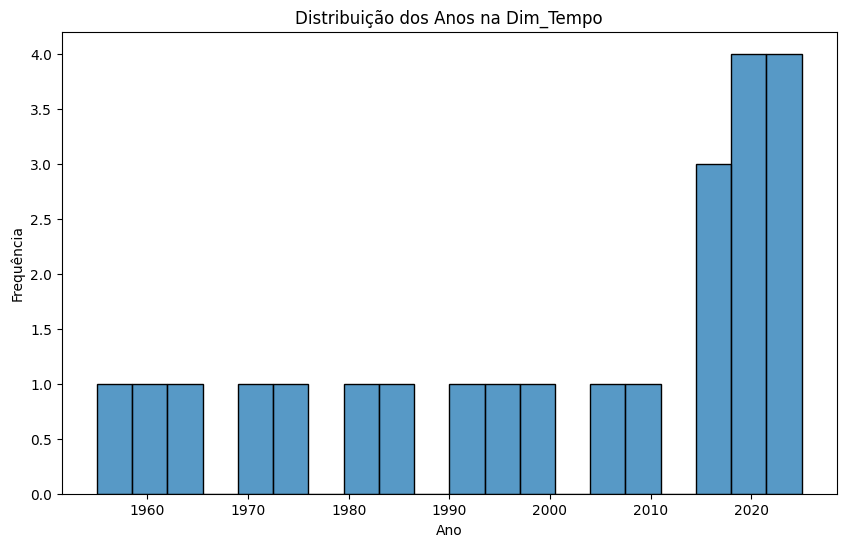

In [27]:
print("Dim_Tempo - Visualização das primeiras linhas:")
display(dim_tempo.head())

print("Estatísticas descritivas da Dim_Tempo:")
print(dim_tempo.describe())

plt.figure(figsize=(10, 6))
sns.histplot(dim_tempo['Ano'], bins=20)
plt.title('Distribuição dos Anos na Dim_Tempo')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.savefig('./figs/Dim_Tempo.png')
plt.show()

--- 
## Análise da Dimensão Local

- **Visualização Inicial:**  
  Exibição das primeiras linhas do DataFrame `Dim_Local` para conferir a estrutura dos dados.

- **Contagem por Continente:**  
  Cálculo da quantidade de países em cada continente para identificar a distribuição regional.

- **Visualização Gráfica:**  
  Um gráfico de barras (countplot) foi produzido para ilustrar o número de países por continente.

Dim_Local - Visualização das primeiras linhas:


,ID_Local,Pais,Continente
0,1,india,Asia
1,2,china,Asia
2,3,united states,north america
3,4,indonesia,asia
4,5,pakistan,asia


Contagem de países por Continente:
Continente
africa             58
europe             47
asia               44
central america    35
oceania            23
south america      15
north america       5
europe/asia         5
Asia                2
Name: count, dtype: int64


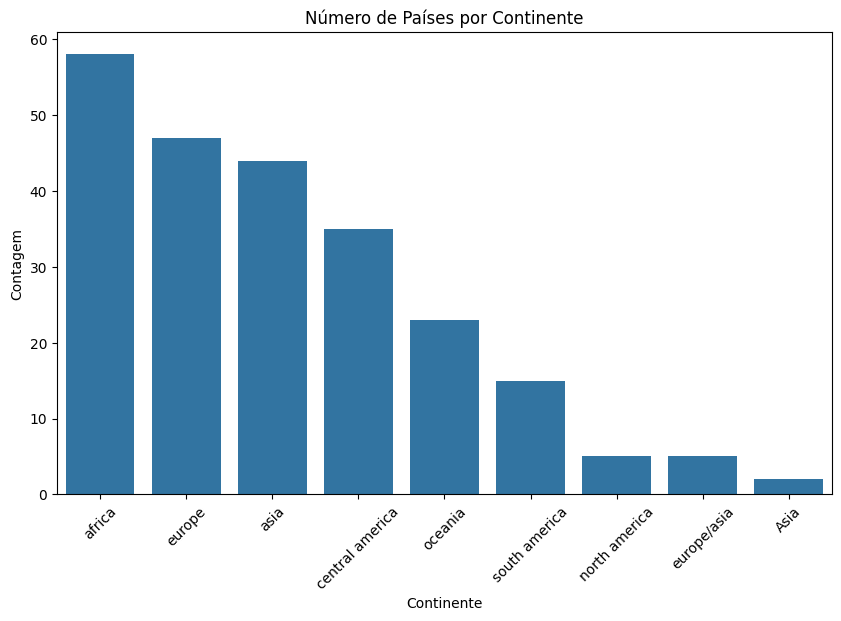

In [28]:
print("Dim_Local - Visualização das primeiras linhas:")
display(dim_local.head())

print("Contagem de países por Continente:")
print(dim_local['Continente'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=dim_local, x='Continente', order=dim_local['Continente'].value_counts().index)
plt.title('Número de Países por Continente')
plt.xlabel('Continente')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.savefig('./figs/Dim_Local.png')
plt.show()

---
## Análise da Dimensão Religião

- **Visualização Inicial:**  
  Exibição das primeiras linhas do DataFrame `Dim_Religiao`.

- **Contagem por Classificação:**  
  Análise da contagem das diferentes classificações religiosas para identificar quais são as mais representativas.

- **Visualização Gráfica:**  
  Um gráfico de barras foi utilizado para demonstrar a distribuição dos registros por classificação religiosa.

Dim_Religiao - Visualização das primeiras linhas:


,ID_Religiao,Nome_Religiao,Classificacao
0,1,christianity_protestant,Cristão
1,2,christianity_romancatholic,Cristão
2,3,christianity_easternorthodox,Cristão
3,4,christianity_anglican,Cristão
4,5,christianity_other,Cristão


Contagem de religiões por Classificação:
Classificacao
Muçulmano                8
Cristão                  6
Judaico                  5
Outros                   5
Tradicionais             5
Budista                  4
Hindu                    1
Secular/Não Religioso    1
Não Informado            1
Name: count, dtype: int64


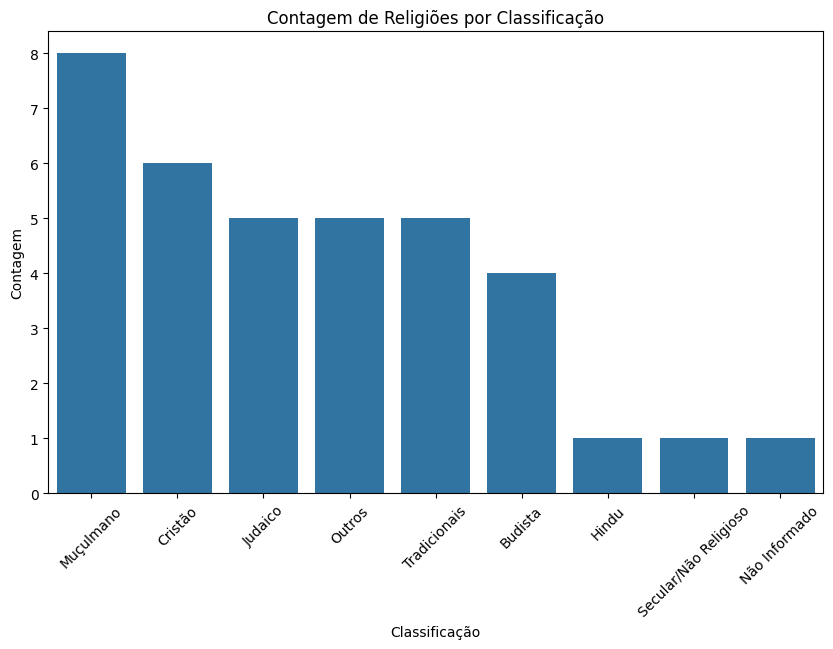

In [29]:
print("Dim_Religiao - Visualização das primeiras linhas:")
display(dim_religiao.head())

print("Contagem de religiões por Classificação:")
print(dim_religiao['Classificacao'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=dim_religiao, x='Classificacao', order=dim_religiao['Classificacao'].value_counts().index)
plt.title('Contagem de Religiões por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.savefig('./figs/Dim_Religiao.png')
plt.show()

--- 
## Análise da Tabela Fato (Fato_Populacao)

- **Visualização Inicial:**  
  Exibição das primeiras linhas do DataFrame `Fato_Populacao` para uma inspeção preliminar.

- **Informações Gerais:**  
  Uso de `info()` para verificar os tipos de dados e a presença de valores nulos.

- **Estatísticas Descritivas:**  
  Cálculo de estatísticas descritivas para as variáveis numéricas, oferecendo uma visão geral das distribuições e medidas de tendência central.

- **Análise de Valores Ausentes:**  
  Verificação da quantidade de valores ausentes por coluna para identificar potenciais problemas de qualidade dos dados.

- **Visualizações Gráficas:**  
  - Histogramas para analisar a distribuição da População Total e da Taxa de Crescimento.  
  - Gráficos de barras (countplots) para visualizar a distribuição dos registros por nível de Conflito.  
  - Boxplots para identificar outliers e a distribuição das variáveis numéricas.  
  - Um mapa de correlação para investigar a relação entre as variáveis numéricas.

Visualizando as primeiras linhas da tabela Fato_Populacao:


,Chave_Tempo,Chave_Local,Chave_Religiao,Em_Conflito,Populacao_Total,Populacao_Urbana,Populacao_Rural,Taxa_Crescimento,Expectativa_Vida,Taxa_Mortalidade,PIB_Per_Capita,Acesso_Educacao,Medicos_Por_Habitante
0,23,1,36,Baixo,1463865525,542742539,921122986,0.89,NaN,NaN,NaN,NaN,NaN
1,22,1,36,Baixo,1450935791,530387142,920548649,0.89,NaN,NaN,NaN,NaN,NaN
2,21,1,36,Médio,1438069596,518239122,919830474,0.89,72.0026,NaN,9160.063,NaN,NaN
3,20,1,36,Médio,1425423212,506304869,919118343,0.79,71.6984,NaN,8544.688,NaN,NaN
4,18,1,36,Médio,1402617695,483098640,919519055,0.98,70.1563,NaN,7399.531,34.076544,7.23


Informações gerais da tabela:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Chave_Tempo            4344 non-null   int64  
 1   Chave_Local            4344 non-null   int64  
 2   Chave_Religiao         4344 non-null   int64  
 3   Em_Conflito            4344 non-null   object 
 4   Populacao_Total        4344 non-null   int64  
 5   Populacao_Urbana       4344 non-null   int64  
 6   Populacao_Rural        4344 non-null   int64  
 7   Taxa_Crescimento       4344 non-null   float64
 8   Expectativa_Vida       3533 non-null   float64
 9   Taxa_Mortalidade       892 non-null    float64
 10  PIB_Per_Capita         1683 non-null   float64
 11  Acesso_Educacao        274 non-null    float64
 12  Medicos_Por_Habitante  803 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 441.3+ KB
Estatísticas descri

,Chave_Tempo,Chave_Local,Chave_Religiao,Populacao_Total,Populacao_Urbana,Populacao_Rural,Taxa_Crescimento,Expectativa_Vida,Taxa_Mortalidade,PIB_Per_Capita,Acesso_Educacao,Medicos_Por_Habitante
count,4344.000000,4344.000000,4344.000000,4.344000e+03,4.344000e+03,4.344000e+03,4344.000000,3533.000000,892.000000,1683.000000,274.000000,803.000000
mean,10.938306,120.578729,26.741252,2.414366e+07,1.171926e+07,1.234379e+07,1.574560,65.636047,801.109030,23432.680213,46.786381,22.023631
std,6.901022,68.767899,12.789995,1.061082e+08,4.884089e+07,6.439431e+07,1.718078,11.747989,308.148958,25123.047195,22.967397,17.031383
min,1.000000,1.000000,2.000000,4.960000e+02,0.000000e+00,0.000000e+00,-9.390000,12.784500,0.000000,525.418700,0.000000,0.220000
25%,5.000000,61.000000,12.000000,2.040535e+05,6.191875e+04,5.667025e+04,0.537500,58.711000,609.943092,4865.185650,29.422946,6.560000
50%,10.000000,121.000000,36.000000,3.315558e+06,1.234752e+06,1.167206e+06,1.510000,68.341200,793.667445,13694.094000,43.381194,21.270000
75%,18.000000,182.000000,36.000000,1.244273e+07,6.269764e+06,6.425888e+06,2.540000,74.247400,986.728955,35726.620000,67.819960,33.595000
max,23.000000,234.000000,36.000000,1.463866e+09,9.565539e+08,9.211230e+08,15.670000,86.372400,1798.885638,137059.190000,97.925280,92.910000


Quantidade de valores ausentes por coluna:
Chave_Tempo                 0
Chave_Local                 0
Chave_Religiao              0
Em_Conflito                 0
Populacao_Total             0
Populacao_Urbana            0
Populacao_Rural             0
Taxa_Crescimento            0
Expectativa_Vida          811
Taxa_Mortalidade         3452
PIB_Per_Capita           2661
Acesso_Educacao          4070
Medicos_Por_Habitante    3541
dtype: int64


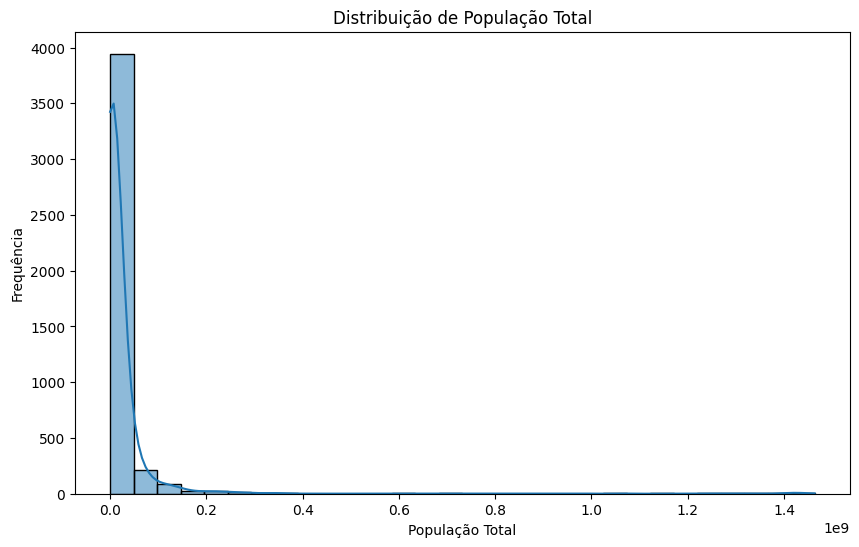

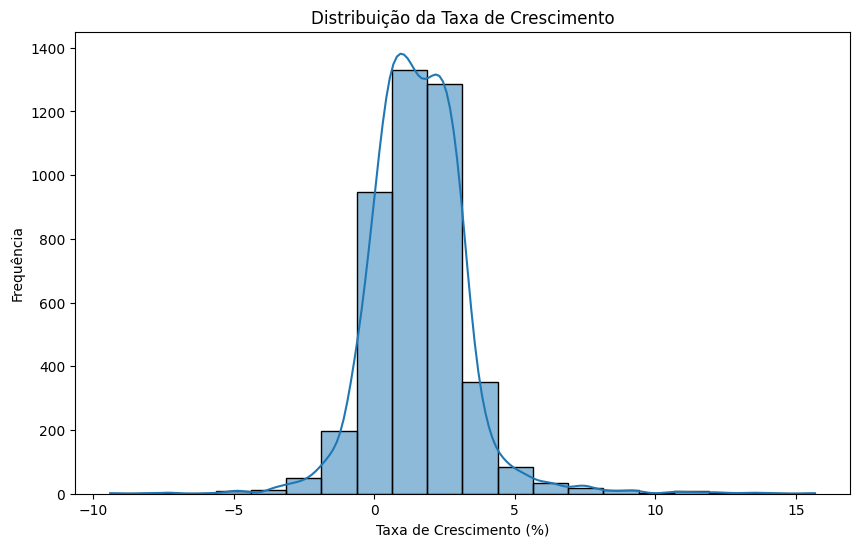

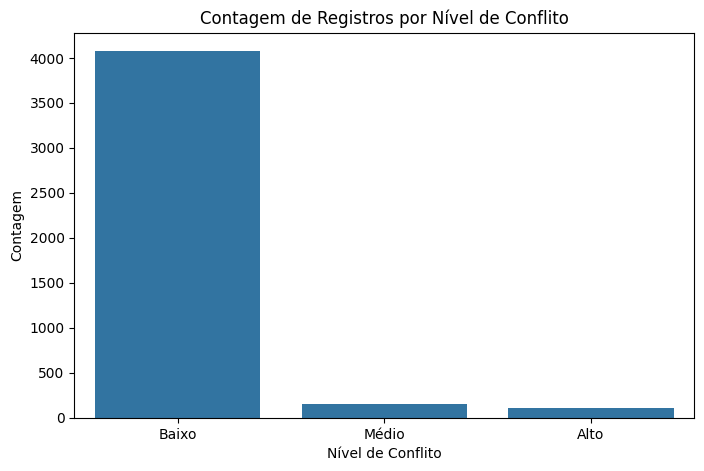

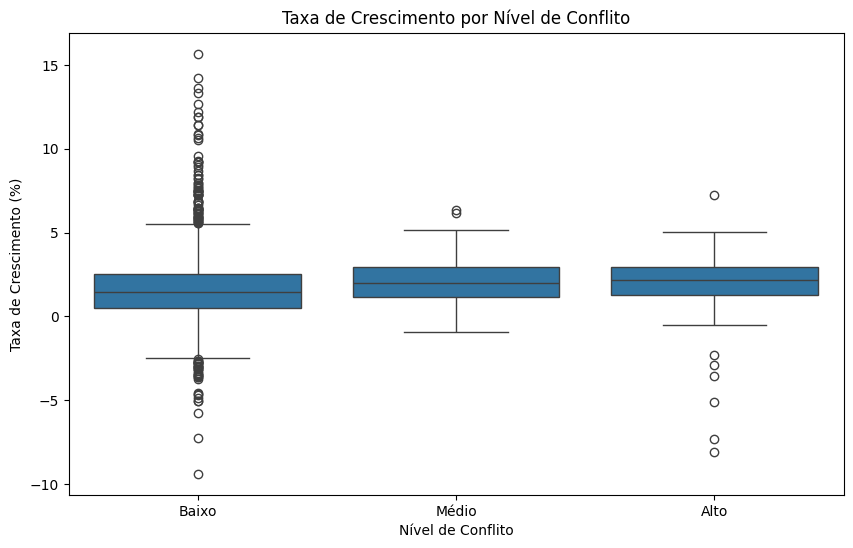

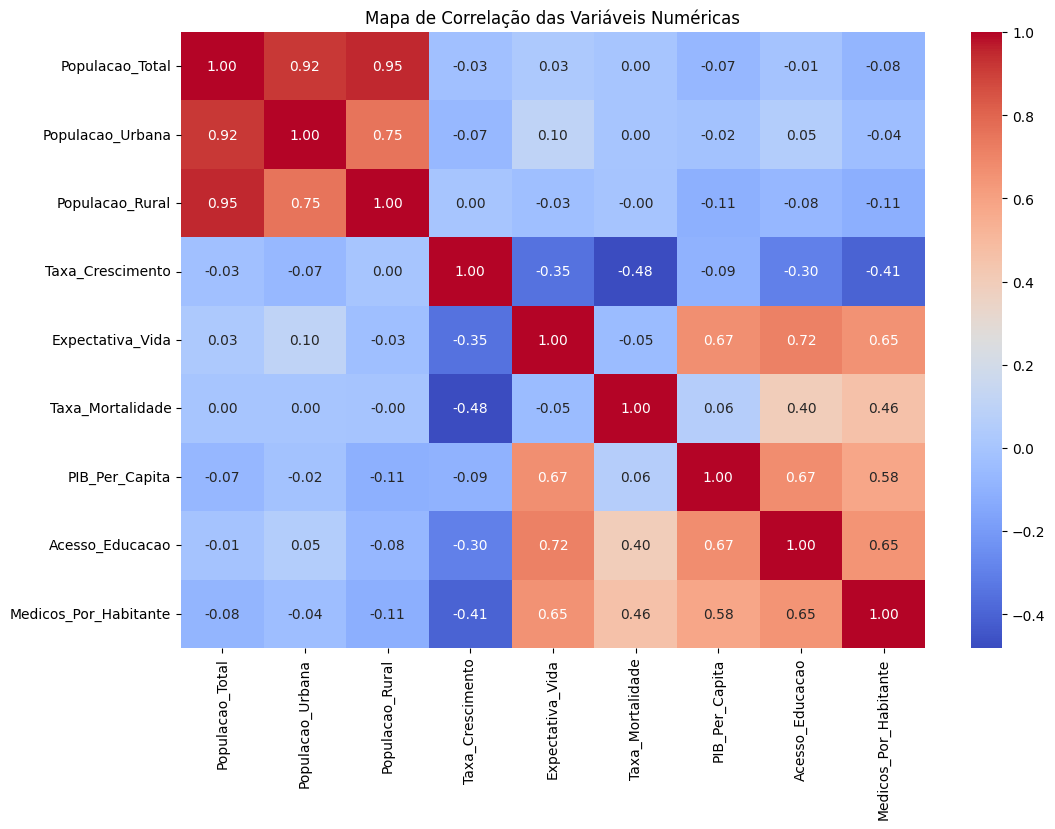

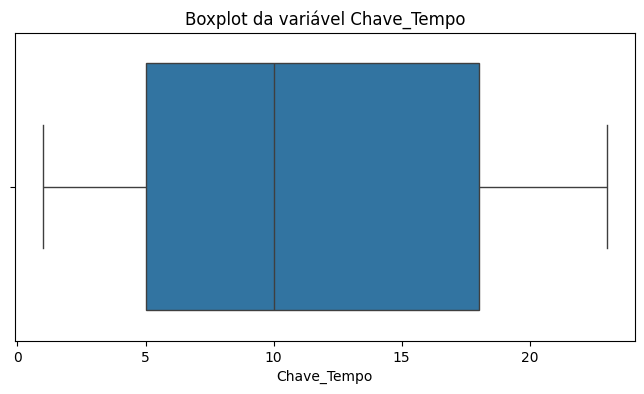

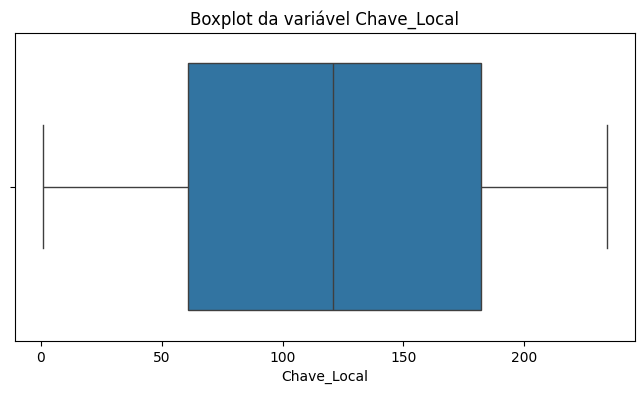

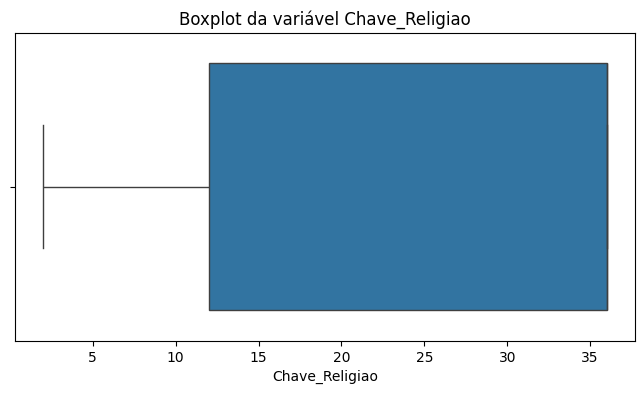

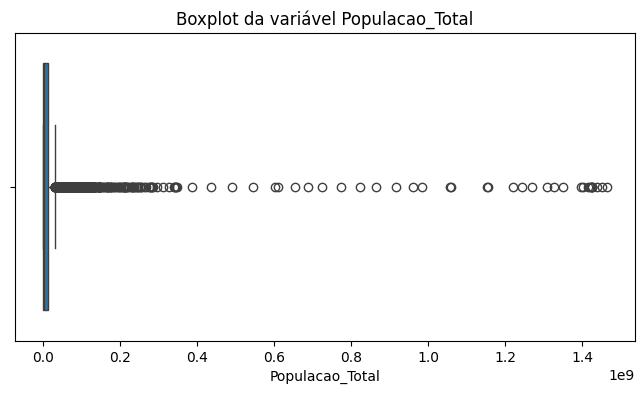

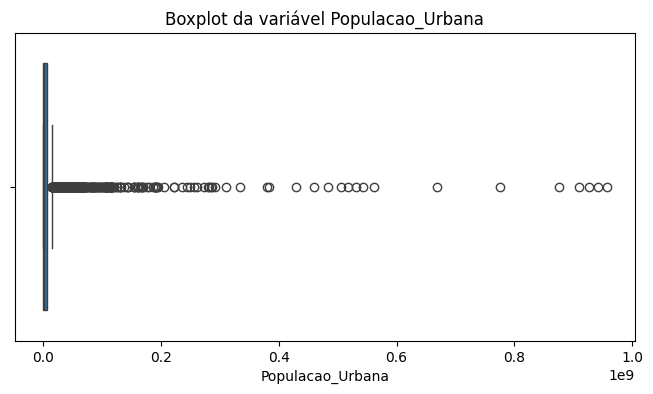

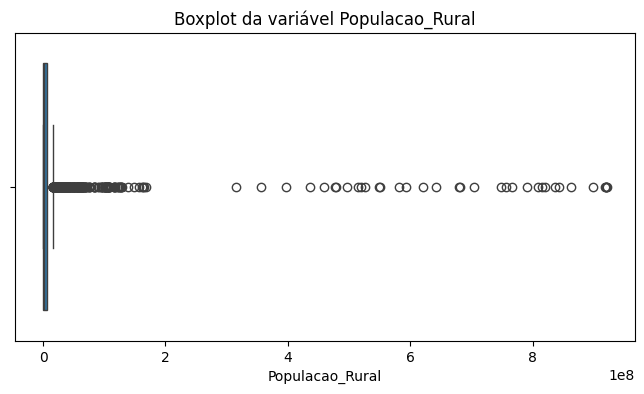

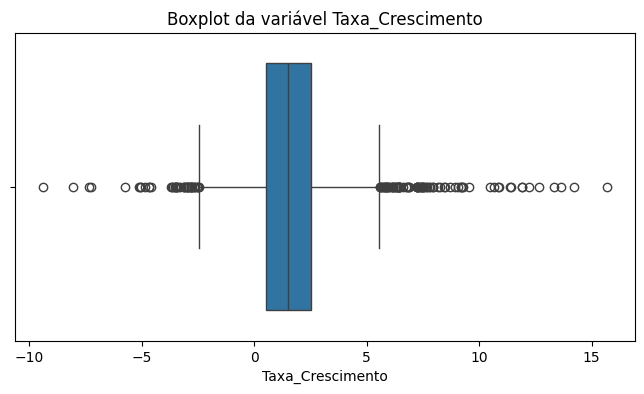

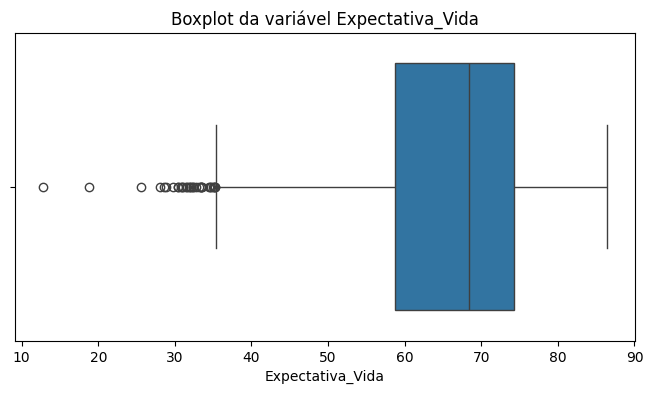

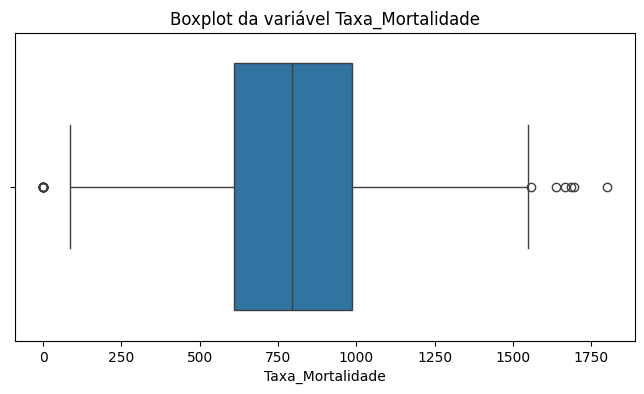

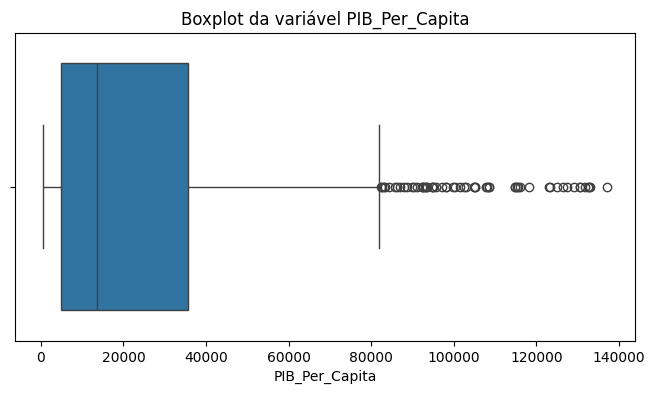

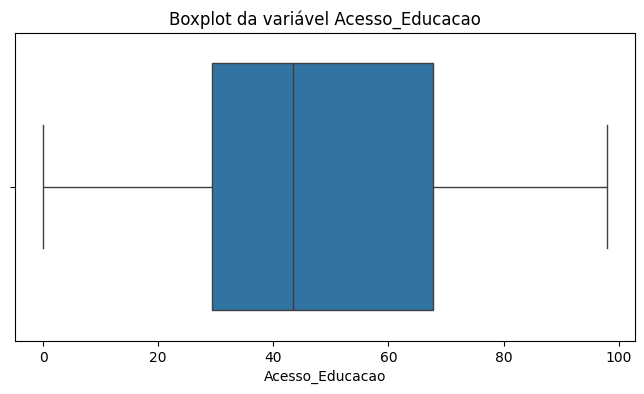

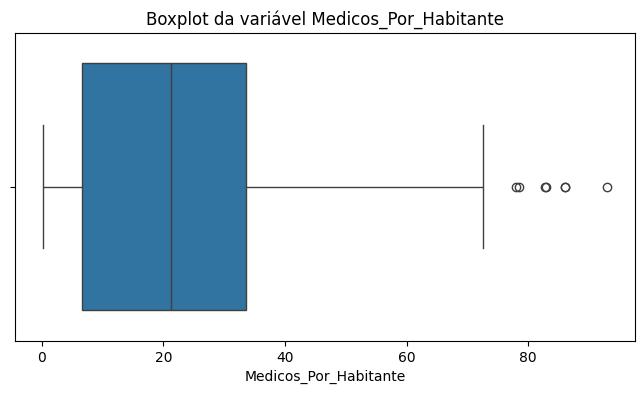

In [30]:
print("Visualizando as primeiras linhas da tabela Fato_Populacao:")
display(fact_df.head())

print("Informações gerais da tabela:")
fact_df.info()

print("Estatísticas descritivas dos dados numéricos:")
display(fact_df.describe())

print("Quantidade de valores ausentes por coluna:")
print(fact_df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(fact_df['Populacao_Total'], bins=30, kde=True)
plt.title('Distribuição de População Total')
plt.xlabel('População Total')
plt.ylabel('Frequência')
plt.savefig('./figs/Fato_Populacao_Total.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(fact_df['Taxa_Crescimento'], bins=20, kde=True)
plt.title('Distribuição da Taxa de Crescimento')
plt.xlabel('Taxa de Crescimento (%)')
plt.ylabel('Frequência')
plt.savefig('./figs/Fato_Taxa_Crescimento.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Em_Conflito', data=fact_df, order=fact_df['Em_Conflito'].value_counts().index)
plt.title('Contagem de Registros por Nível de Conflito')
plt.xlabel('Nível de Conflito')
plt.ylabel('Contagem')
plt.savefig('./figs/Fato_Nivel_Conflito.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Em_Conflito', y='Taxa_Crescimento', data=fact_df, order=fact_df['Em_Conflito'].value_counts().index)
plt.title('Taxa de Crescimento por Nível de Conflito')
plt.xlabel('Nível de Conflito')
plt.ylabel('Taxa de Crescimento (%)')
plt.savefig('./figs/Fato_Crescimento_Nivel_Conflito.png')
plt.show()

plt.figure(figsize=(12, 8))
numeric_cols = fact_df.select_dtypes(include='number')
numeric_cols = numeric_cols.drop(columns=['Chave_Tempo', 'Chave_Religiao', 'Chave_Local'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.savefig('./figs/Fato_Correlacao.png')
plt.show()

numeric_cols = fact_df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=fact_df[col])
    plt.title(f'Boxplot da variável {col}')
    plt.xlabel(col)
    plt.show()

---
# Consultas + Visualização

Nesta seção, foram realizadas diversas consultas ao Data Warehouse com o objetivo de explorar relações entre indicadores demográficos, econômicos e sociais, segmentados por dimensões como religião, localização, tempo e níveis de conflito. A seguir, detalhamos cada consulta, seus objetivos e os tipos de visualizações geradas.

### Consulta 1: Distribuição Religiosa e Impactos Socioeconômicos

**Objetivo:**  
Avaliar a relação entre a predominância de determinadas religiões e indicadores como PIB per capita, expectativa de vida e taxa de mortalidade.

**Descrição:**  
Esta consulta agrega os dados da tabela fato por classificação religiosa, calculando as médias dos indicadores de PIB per capita, expectativa de vida e taxa de mortalidade. Em seguida, são gerados três gráficos de barras (um para cada indicador) para facilitar a comparação entre as religiões.

Consulta 1: Distribuição Religiosa e Impactos Socioeconômicos


,Classificacao,media_pib,media_vida,media_mortalidade
0,Não Informado,27773.632934,68.372111,796.623697
1,Secular/Não Religioso,20161.303886,64.799021,1307.621863
2,Muçulmano,17556.311148,58.473237,525.093820
3,Cristão,20197.274358,65.569941,844.680150
4,Judaico,31695.359000,74.858442,622.905487
5,Budista,11268.367509,58.717130,612.543459
6,Outros,21297.269567,67.321189,515.180988
7,Tradicionais,12708.781518,50.994047,732.767345
8,Hindu,6377.472200,57.389942,712.810603


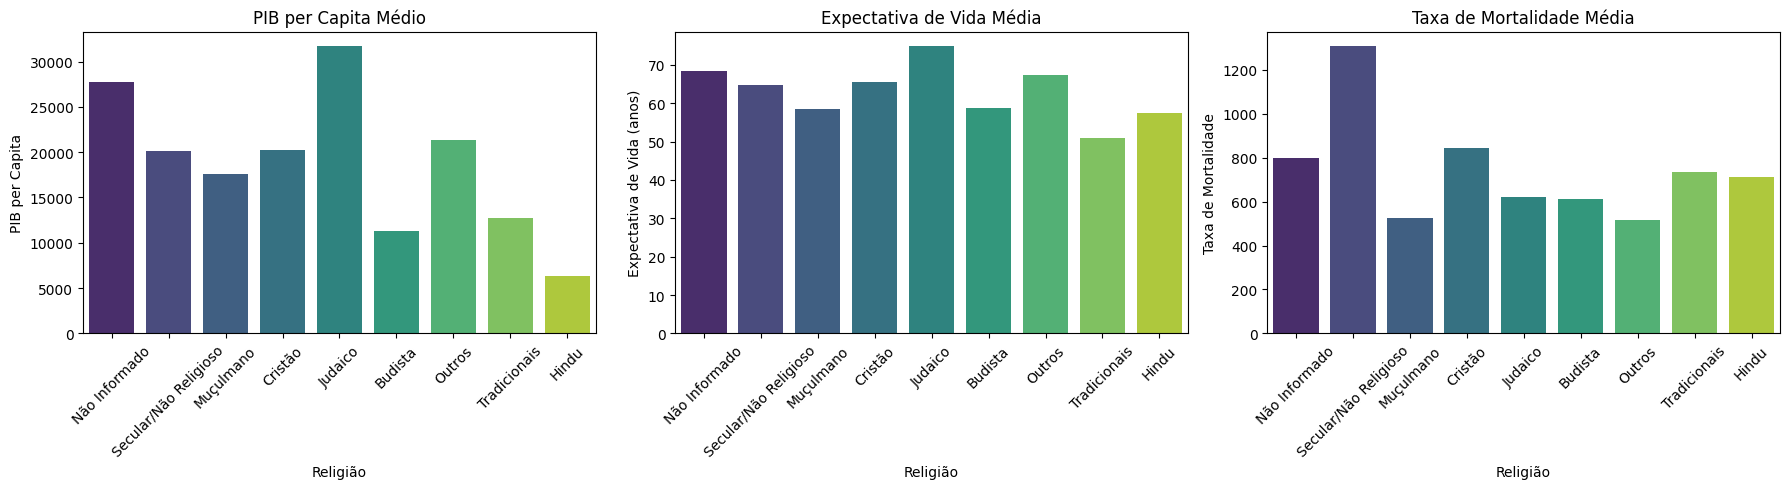

In [31]:
query1 = """
SELECT R."Classificacao", 
       AVG(F."PIB_Per_Capita") AS media_pib, 
       AVG(F."Expectativa_Vida") AS media_vida, 
       AVG(F."Taxa_Mortalidade") AS media_mortalidade
FROM "Fato_Populacao" F
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY R."Classificacao";
"""

df_q1 = pd.read_sql(query1, engine)
print("Consulta 1: Distribuição Religiosa e Impactos Socioeconômicos")
display(df_q1)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x="Classificacao", y="media_pib", data=df_q1, ax=axs[0], palette="viridis")
axs[0].set_title("PIB per Capita Médio")
axs[0].set_xlabel("Religião")
axs[0].set_ylabel("PIB per Capita")
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x="Classificacao", y="media_vida", data=df_q1, ax=axs[1], palette="viridis")
axs[1].set_title("Expectativa de Vida Média")
axs[1].set_xlabel("Religião")
axs[1].set_ylabel("Expectativa de Vida (anos)")
axs[1].tick_params(axis='x', rotation=45)

sns.barplot(x="Classificacao", y="media_mortalidade", data=df_q1, ax=axs[2], palette="viridis")
axs[2].set_title("Taxa de Mortalidade Média")
axs[2].set_xlabel("Religião")
axs[2].set_ylabel("Taxa de Mortalidade")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./figs/Consulta1.png')
plt.show()

--- 
### Consulta 2: Tendências Religiosas e Urbanização

**Objetivo:**  
Examinar a relação entre a taxa de urbanização e a distribuição de religiões ao longo do tempo.

**Descrição:**  
Esta consulta une as dimensões tempo e religião com a tabela fato para calcular a taxa de urbanização (a razão entre população urbana e total, em percentual) para cada religião e ano. A visualização consiste em um gráfico de linhas, onde cada linha representa a evolução da taxa de urbanização de uma religião específica ao longo dos anos.

Consulta 2: Tendências Religiosas e Urbanização


,Ano,Classificacao,urban_rate
0,1955,Budista,13.879420
1,1955,Cristão,49.445438
2,1955,Hindu,10.812651
3,1955,Judaico,76.302738
4,1955,Muçulmano,29.503644
5,1955,Não Informado,30.063192
6,1955,Outros,21.417916
7,1955,Secular/Não Religioso,29.648482
8,1955,Tradicionais,32.471003
9,1960,Budista,14.835275


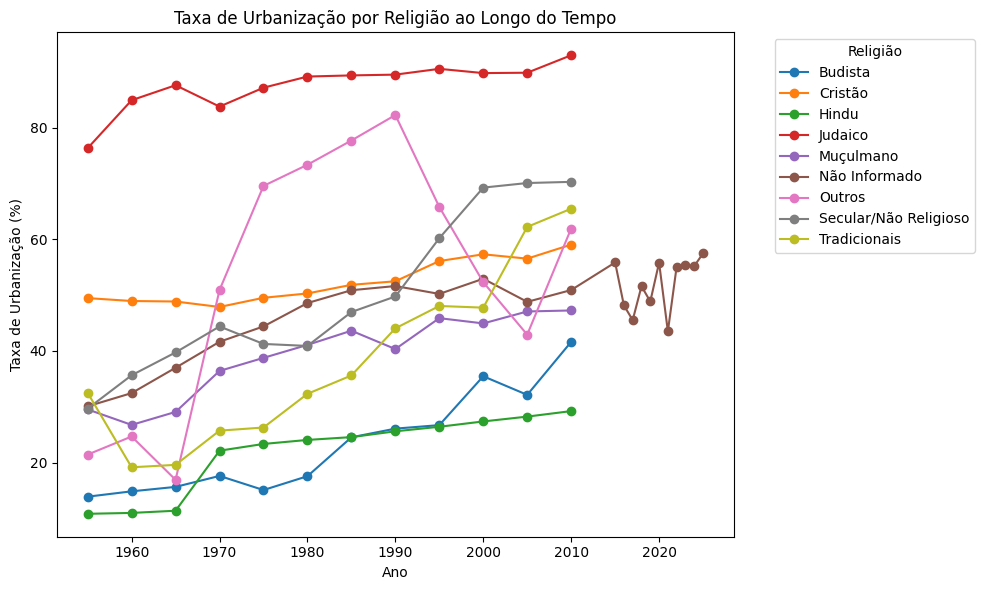

In [32]:
query2 = """
SELECT T."Ano", 
       R."Classificacao", 
       AVG(CAST(F."Populacao_Urbana" AS FLOAT)/F."Populacao_Total")*100 AS urban_rate
FROM "Fato_Populacao" F
JOIN "Dim_Tempo" T ON F."Chave_Tempo" = T."ID_Tempo"
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY T."Ano", R."Classificacao"
ORDER BY T."Ano";
"""

df_q2 = pd.read_sql(query2, engine)
print("Consulta 2: Tendências Religiosas e Urbanização")
display(df_q2.head(15))

plt.figure(figsize=(10,6))
for relig in df_q2["Classificacao"].unique():
    dados_relig = df_q2[df_q2["Classificacao"] == relig]
    plt.plot(dados_relig["Ano"], dados_relig["urban_rate"], marker='o', label=relig)
plt.title("Taxa de Urbanização por Religião ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Taxa de Urbanização (%)")
plt.legend(title="Religião", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./figs/Consulta2.png')
plt.show()


--- 
### Consulta 3: Impacto de Conflitos Políticos na População

**Objetivo:**  
Analisar como situações de conflito político afetam métricas como população total, urbanização e PIB per capita.

**Descrição:**  
Esta consulta agrupa os dados da tabela fato com base no nível de conflito (Baixo, Médio, Alto) e calcula as médias de população total, população urbana e PIB per capita para cada nível. Em seguida, três gráficos de barras são gerados para comparar esses indicadores entre os diferentes níveis de conflito.

Consulta 3: Impacto de Conflitos Políticos na População


,Em_Conflito,media_pop_total,media_pop_urbana,media_pib
0,Baixo,1.988680e+07,1.010652e+07,26072.266330
1,Alto,9.922340e+07,4.026085e+07,7393.731892
2,Médio,8.157774e+07,3.340978e+07,8542.554525


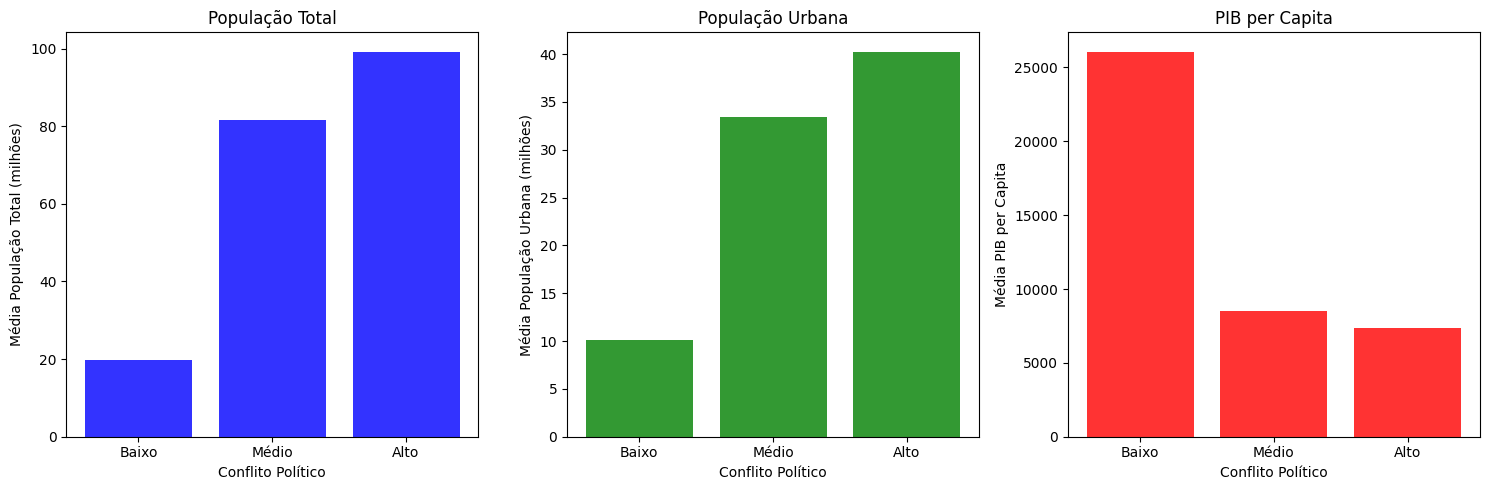

In [33]:
query3 = """
SELECT F."Em_Conflito", 
       AVG(F."Populacao_Total") AS media_pop_total, 
       AVG(F."Populacao_Urbana") AS media_pop_urbana, 
       AVG(F."PIB_Per_Capita") AS media_pib
FROM "Fato_Populacao" F
GROUP BY F."Em_Conflito";
"""
df_q3 = pd.read_sql(query3, engine)
print("Consulta 3: Impacto de Conflitos Políticos na População")
display(df_q3)

ordem = ['Baixo', 'Médio', 'Alto']
df_q3 = df_q3.set_index('Em_Conflito').reindex(ordem).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(df_q3['Em_Conflito'], df_q3['media_pop_total'] / 1e6, color='b', alpha=0.8)
axes[0].set_xlabel('Conflito Político')
axes[0].set_ylabel('Média População Total (milhões)')
axes[0].set_title('População Total')

axes[1].bar(df_q3['Em_Conflito'], df_q3['media_pop_urbana'] / 1e6, color='g', alpha=0.8)
axes[1].set_xlabel('Conflito Político')
axes[1].set_ylabel('Média População Urbana (milhões)')
axes[1].set_title('População Urbana')

axes[2].bar(df_q3['Em_Conflito'], df_q3['media_pib'], color='r', alpha=0.8)
axes[2].set_xlabel('Conflito Político')
axes[2].set_ylabel('Média PIB per Capita')
axes[2].set_title('PIB per Capita')

plt.tight_layout()
plt.savefig('./figs/Consulta3.png')
plt.show()

---
### Consulta 4: Taxa de Mortalidade por Região e Religião

**Objetivo:**  
Analisar a taxa de mortalidade média por continente e por classificação religiosa.

**Descrição:**  
Esta consulta faz join entre a tabela fato ("Fato_Populacao"), a dimensão local ("Dim_Local") e a dimensão de religião ("Dim_Religiao"). Em seguida, agrupa os resultados pelo continente e pela classificação religiosa, calculando a média da taxa de mortalidade para cada grupo.

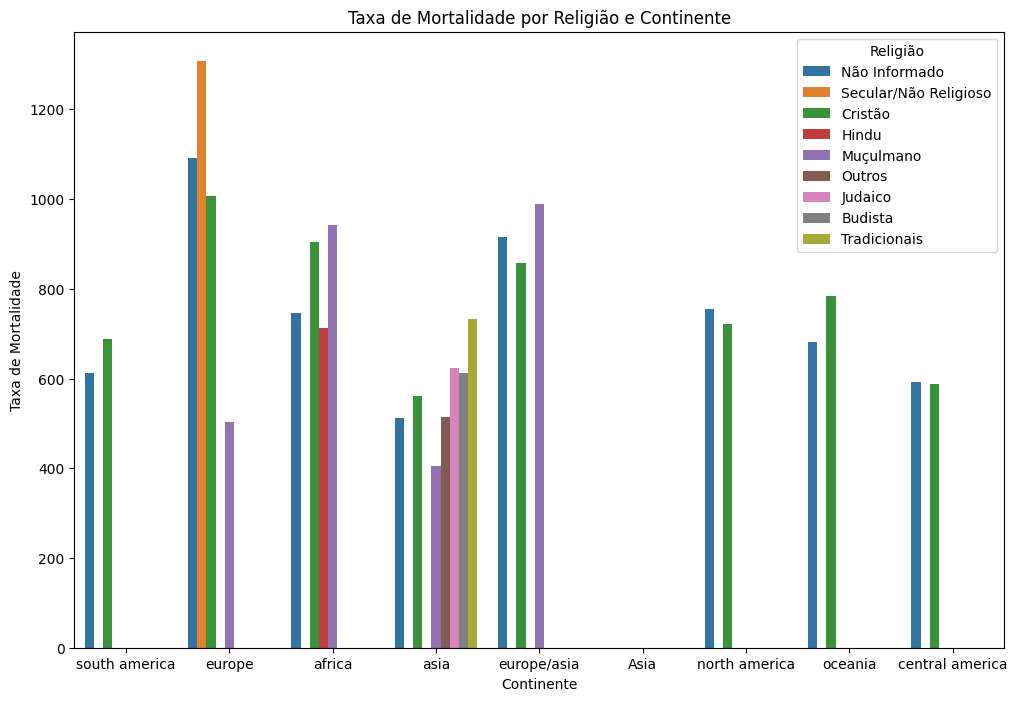

In [34]:
query4 = """
SELECT 
    R."Classificacao",
    L."Continente",
    AVG(F."Taxa_Mortalidade") AS media_mortalidade
FROM "Fato_Populacao" F
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
JOIN "Dim_Local" L ON F."Chave_Local" = L."ID_Local"
GROUP BY R."Classificacao", L."Continente";
"""
df_q4 = pd.read_sql_query(query4, engine)

plt.figure(figsize=(12, 8))
sns.barplot(x="Continente", y="media_mortalidade", hue="Classificacao", data=df_q4)
plt.title("Taxa de Mortalidade por Religião e Continente")
plt.xlabel("Continente")
plt.ylabel("Taxa de Mortalidade")
plt.legend(title="Religião")
plt.savefig('./figs/Consulta4.png')
plt.show()

--- 
### Consulta 5: PIB per Capita e Indicadores de Saúde por Religião

**Objetivo:**  
Comparar o PIB per capita com indicadores de saúde (expectativa de vida e taxa de mortalidade) por religião.

**Descrição:**  
Esta consulta agrupa os dados por classificação religiosa e calcula as médias do PIB per capita, expectativa de vida e taxa de mortalidade. Um scatter plot é gerado para visualizar a relação entre o PIB per capita e a expectativa de vida, com o tamanho das bolhas representando a taxa de mortalidade. Adicionalmente, os nomes das religiões são adicionados como rótulos em cada ponto.

Consulta 5: PIB per Capita e Indicadores de Saúde por Religião


,Classificacao,media_pib,media_vida,media_mortalidade
0,Não Informado,27773.632934,68.372111,796.623697
1,Secular/Não Religioso,20161.303886,64.799021,1307.621863
2,Muçulmano,17556.311148,58.473237,525.093820
3,Cristão,20197.274358,65.569941,844.680150
4,Judaico,31695.359000,74.858442,622.905487
5,Budista,11268.367509,58.717130,612.543459
6,Outros,21297.269567,67.321189,515.180988
7,Tradicionais,12708.781518,50.994047,732.767345
8,Hindu,6377.472200,57.389942,712.810603


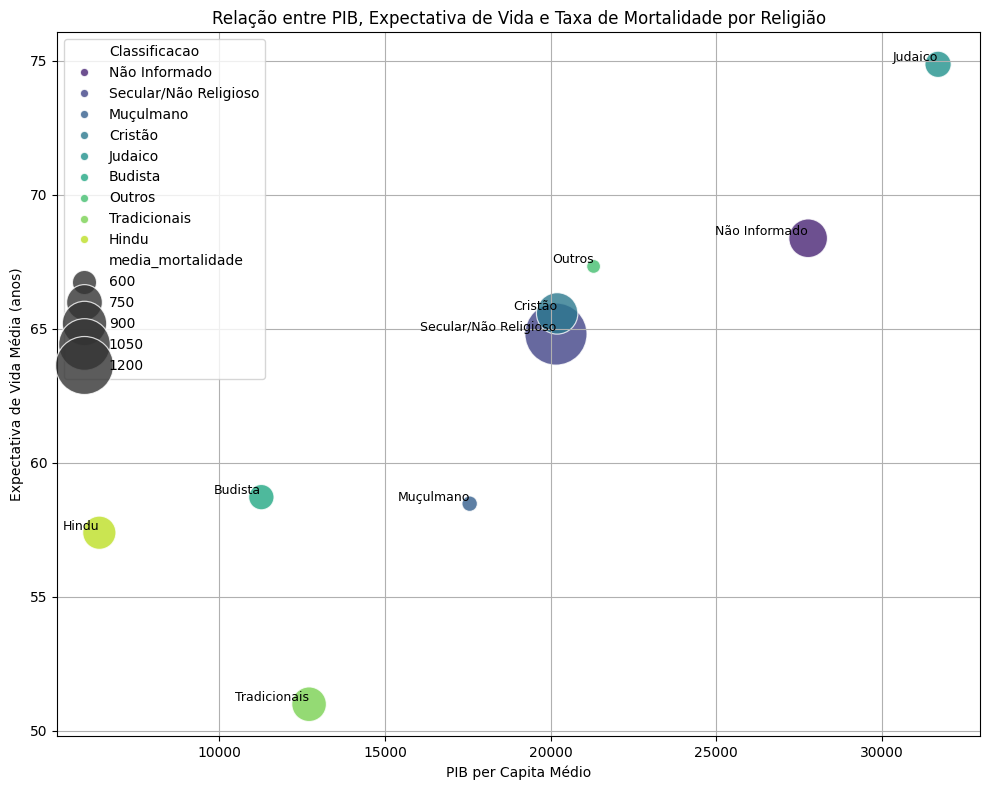

In [36]:
query5 = """
SELECT R."Classificacao", 
       AVG(F."PIB_Per_Capita") AS media_pib, 
       AVG(F."Expectativa_Vida") AS media_vida, 
       AVG(F."Taxa_Mortalidade") AS media_mortalidade
FROM "Fato_Populacao" F
JOIN "Dim_Religiao" R ON F."Chave_Religiao" = R."ID_Religiao"
GROUP BY R."Classificacao";
"""
df_q5 = pd.read_sql(query5, engine)
print("Consulta 5: PIB per Capita e Indicadores de Saúde por Religião")
display(df_q5)

plt.figure(figsize=(10,8))

# Utilizando o seaborn para criar o scatter plot com mapeamento do tamanho das bolhas e cores por religião.
scatter = sns.scatterplot(
    data=df_q5, 
    x='media_pib', 
    y='media_vida', 
    size='media_mortalidade', 
    sizes=(100, 2000),   # Ajuste os limites de tamanho para melhor visualização
    hue='Classificacao', 
    palette='viridis',
    alpha=0.8,
    legend='brief'
)

# Adiciona os labels das religiões sobre cada ponto
for idx, row in df_q5.iterrows():
    plt.text(row['media_pib'], row['media_vida'], row['Classificacao'],
             fontsize=9, ha='right', va='bottom')

plt.xlabel("PIB per Capita Médio")
plt.ylabel("Expectativa de Vida Média (anos)")
plt.title("Relação entre PIB, Expectativa de Vida e Taxa de Mortalidade por Religião")
plt.grid(True)
plt.tight_layout()
plt.show()

--- 
# Conclusões e Considerações Finais

Este projeto foi extremamente enriquecedor, pois nos proporcionou uma oportunidade prática de aprender a lidar com dados heterogêneos e a consolidar informações de diversas fontes em um único Data Warehouse. A seguir, apresentamos os principais pontos e aprendizados:

- **Projeto Engrandecedor:**  
  O desenvolvimento deste projeto possibilitou um aprofundamento significativo no manejo de dados variados, demonstrando a importância de integrar informações de fontes distintas para a tomada de decisões fundamentadas.

- **Desafios na Disponibilidade de Dados:**  
  Durante a execução, percebemos que os dados disponíveis para cada tema variam bastante em qualidade e consistência. Essa experiência evidenciou as dificuldades de reunir dados completos e confiáveis para gerar análises robustas.

- **Aprendizado em Modelagem Multidimensional:**  
  No início, o grupo enfrentou desafios para compreender a modelagem multidimensional. No entanto, com o apoio e orientação da professora, conseguimos superar essas dificuldades e implementar uma estrutura de dados adequada para o nosso DW.

- **Extração de Dados em Ambientes Dinâmicos:**  
  Um dos principais desafios técnicos foi o fato do site utilizado para scraping apresentar uma estrutura dinâmica. Isso exigiu adaptações constantes no processo de extração, tornando o trabalho mais complexo, porém, muito instrutivo.

- **Limitações e Dados Faltantes:**  
  Encontramos limitantes relacionadas à ausência de dados em alguns registros, o que impactou a composição das entradas no banco. Essa situação reforçou a importância de estratégias robustas para tratamento e validação dos dados.

- **Agradecimentos:**  
  Agradecemos pela oportunidade de desenvolver este projeto, que nos permitiu expandir nossos conhecimentos e enfrentar desafios reais do ambiente de dados. Em especial, somos gratos à professora, cujo suporte foi fundamental para o sucesso do trabalho.

Por final, segue o fluxograma da ETL até o DW:

<center><img src="./figs/diagramaETL.png" style="max-width:750px; max-height:700px;"><center>

---
# Fontes e Bibliografia

- **Worldometers.** (2025). *World Population.* Disponível em: [https://www.worldometers.info/world-population/](https://www.worldometers.info/world-population/)

- **Our World in Data.** (2025). *Our World in Data.* Disponível em: [http://ourworldindata.org/](http://ourworldindata.org/)

- **WHO - World Health Statistics.** (2025). *World Health Statistics.* Disponível em: [https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/world-health-statistics](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/world-health-statistics)

- **Kaggle.** (2025). *Kaggle: Datasets, Competitions and Community.* Disponível em: [https://www.kaggle.com/](https://www.kaggle.com/)

- **Kimball, R., & Ross, M.** (2013). *The Data Warehouse Toolkit: The Definitive Guide to Dimensional Modeling.* John Wiley & Sons.
